<h1>Load yours data</h1>

In [1]:
# -- Import --
import pandas as pd
import ta
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from math import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import ccxt
sys.path.append( '../../utilities' )
from data_engine import DataEngine

# -- You can change the crypto pair ,the start date and the time interval below --
pair = 'BTC/USDT'
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

dataEngine = DataEngine(session=ccxt.binance(), path_to_data='../database/')

df = dataEngine.get_historical_from_db(pair, timeframe, startDate)

print("Data loaded 100%")

# -- Uncomment the line below if you want to check your price dataset --
# df

Successfully load 39586 candles for BTCUSDT
Data loaded 100%


<h1>Define your indicators</h1>

In [2]:
# -- Indicator variable --
trixLength = 11
trixSignal = 20
stochWindow = 14

# -- Drop all columns we do not need --
df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

# -- Indicators, you can edit every value --
df['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength), window=trixLength), window=trixLength)
df['TRIX_PCT'] = df["TRIX"].pct_change()*100
df['TRIX_SIGNAL'] = ta.trend.sma_indicator(df['TRIX_PCT'], trixSignal)
df['TRIX_HISTO'] = df['TRIX_PCT'] - df['TRIX_SIGNAL']
df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=14, smooth1=3, smooth2=3)


print("Indicators loaded 100%")
df

Indicators loaded 100%


,open,high,low,close,volume,TRIX,TRIX_PCT,TRIX_SIGNAL,TRIX_HISTO,STOCH_RSI
timestamp,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,NaN,NaN,NaN,NaN,NaN
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,NaN,NaN,NaN,NaN,NaN
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,NaN,NaN,NaN,NaN,NaN
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-02-26 15:00:00,39209.64,39358.14,39146.56,39215.66,1334.937550,39082.968458,0.009806,0.104162,-0.094356,0.584664
2022-02-26 16:00:00,39215.66,39320.36,39036.73,39148.75,915.396840,39086.403623,0.008789,0.095021,-0.086232,0.582954
2022-02-26 17:00:00,39148.75,39309.23,39090.03,39248.58,740.572550,39090.105524,0.009471,0.086789,-0.077318,0.828059


<h1>Overbought optimizer</h1>

Loading... 52 / 52


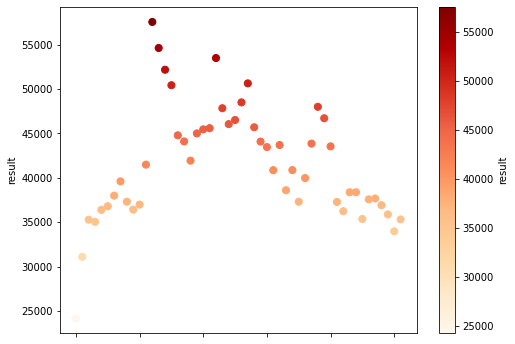

    param1        result
0     50.0  24203.873330
1     51.0  31131.927909
50   100.0  34001.921845
3     53.0  35072.917384
2     52.0  35307.145073
51   101.0  35337.402219
45    95.0  35383.451271
49    99.0  35897.643495
42    92.0  36256.795585
4     54.0  36415.422040
9     59.0  36440.966837
5     55.0  36822.009426
48    98.0  36938.635102
10    60.0  37004.893503
41    91.0  37298.723717
35    85.0  37328.863048
8     58.0  37329.943553
46    96.0  37591.625320
47    97.0  37691.915596
6     56.0  38012.057802
43    93.0  38392.623048
44    94.0  38394.911409
33    83.0  38618.936444
7     57.0  39616.713977
36    86.0  39988.149788
31    81.0  40874.528782
34    84.0  40882.167478
11    61.0  41495.763424
18    68.0  41946.079437
30    80.0  43468.694290
40    90.0  43552.070076
32    82.0  43702.988271
37    87.0  43859.282845
29    79.0  44089.760899
17    67.0  44101.896338
16    66.0  44790.540913
19    69.0  45003.488794
20    70.0  45461.070249
21    71.0  45594.917211


In [3]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df['2017-01-01':]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['TRIX_HISTO'] >= 0 and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0:
        return True
  else:
        return False

loopI = [50, 102, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
  count += 1
  clear_output(wait=True)
  print("Loading...",count,'/',maxCount)
  # -- You can change variables below --
  usdt = 1000
  coin = 0

  stochTop = i / 100

  previousRow = dfTest.iloc[0]

  for index, row in dfTest.iterrows():
    #BUY
    if buyCondition(row, stochTop) and usdt > 0:
      coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
      usdt = 0

    #SELL
    elif sellCondition(row) and coin > 0:
      usdt = coin * row['close'] - (0.0007 * coin * row['close'])
      coin = 0

  myrow = {'param1': i,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
  dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))

plt.show()

print(dt.sort_values(by=['result']))

<h2>Trix Parameters Optimizer</h2>

Loading... 260 / 260


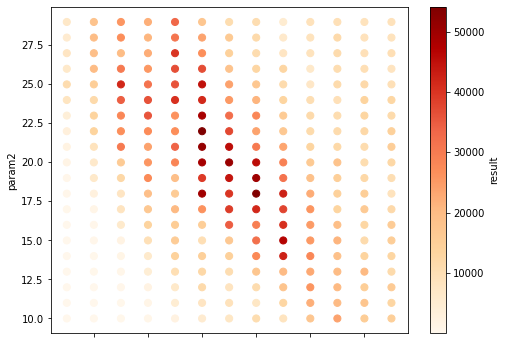

     param1  param2        result
0       5.0    10.0     10.504193
1       5.0    11.0     20.199291
2       5.0    12.0     28.167610
3       5.0    13.0     50.451521
20      6.0    10.0     69.433153
..      ...     ...           ...
149    12.0    19.0  49853.245452
130    11.0    20.0  50629.491667
111    10.0    21.0  51202.496860
148    12.0    18.0  53697.298767
112    10.0    22.0  54060.311131

[260 rows x 3 columns]


In [12]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['TRIX_HISTO'] >= 0 and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0:
        return True
  else:
        return False

loopI = [5, 18, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

loopJ = [10, 30, 1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

count = 0
maxCount = enumI * enumJ
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    count += 1
    clear_output(wait=True)
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    trixLength = i
    trixSignal = j
    # -- Indicators, you can edit every value --
    dfTest['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=dfTest['close'], window=trixLength), window=trixLength), window=trixLength)
    dfTest['TRIX_PCT'] = dfTest["TRIX"].pct_change()*100
    dfTest['TRIX_SIGNAL'] = ta.trend.sma_indicator(dfTest['TRIX_PCT'], trixSignal)
    dfTest['TRIX_HISTO'] = dfTest['TRIX_PCT'] - dfTest['TRIX_SIGNAL']

    stochTop = 0.77

    previousRow = dfTest.iloc[0]

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row, stochTop) and usdt > 0:
        coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin * row['close'] - (0.0007 * coin * row['close'])
        coin = 0

    myrow = {'param1': i, 'param2': j,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>Stock RSI Optimizer</h1>

Loading... 34 / 34


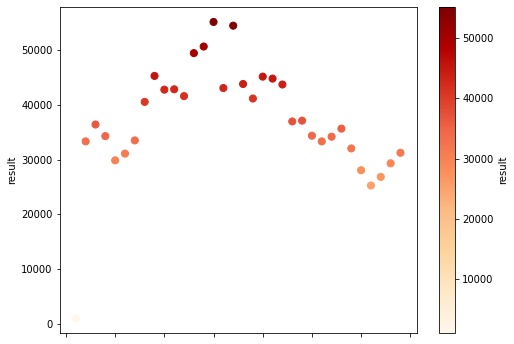

    param1        result
0      1.0   1000.000000
30    31.0  25270.511614
31    32.0  26844.415024
29    30.0  28047.628022
32    33.0  29316.656278
4      5.0  29851.704416
5      6.0  31090.964361
33    34.0  31238.223462
28    29.0  32033.642102
25    26.0  33316.977172
1      2.0  33318.946911
6      7.0  33500.233478
26    27.0  34171.337605
3      4.0  34281.728245
24    25.0  34356.269745
27    28.0  35650.323717
2      3.0  36401.675702
22    23.0  36958.940096
23    24.0  37107.825787
7      8.0  40524.909809
18    19.0  41142.028250
11    12.0  41580.366044
9     10.0  42764.530958
10    11.0  42825.470380
15    16.0  43054.999401
21    22.0  43702.020432
17    18.0  43793.944482
20    21.0  44777.518461
19    20.0  45141.670142
8      9.0  45265.711280
12    13.0  49428.499917
13    14.0  50629.491667
16    17.0  54437.062687
14    15.0  55113.854469


In [15]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['TRIX_HISTO'] >= 0 and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0:
        return True
  else:
        return False

loopI = [1, 35, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
    count += 1
    clear_output(wait=True)
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    dfTest['STOCH_RSI'] = ta.momentum.stochrsi(close=dfTest['close'], window=i, smooth1=3, smooth2=3)

    stochTop = 0.77

    previousRow = dfTest.iloc[0]

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row, stochTop) and usdt > 0:
        coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin * row['close'] - (0.0007 * coin * row['close'])
        coin = 0

    myrow = {'param1': i,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))

plt.show()

print(dt.sort_values(by=['result']))